<b>Notebook prepared on 11th June, 2022.</b>

# CSGO Players Analysis

<p>In this notebook, I will give a general overview of the dataset. </p>

### Imported Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from ast import literal_eval
import folium
from collections import Counter

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import Ridge

### Global Variables

In [3]:
class CFG:
    dataset_path = ''
    dataset_name = 'hltv_playerStats-complete.csv'
    models_path = '/Models/'

### Loading the dataset

In [4]:
df = pd.read_csv(CFG.dataset_path + CFG.dataset_name)
df.head(5)

,nick,country,stats_link,teams,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",970,25491,5917,1.38,1.27,21602,41.3,15685,3.6,0.85,0.13,0.62,0.10,0.12,74.9,1.45
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],1532,40464,8864,1.34,1.25,34647,41.3,25783,2.4,0.86,0.10,0.64,0.08,0.11,74.2,1.36
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",847,22465,5361,1.45,1.23,17320,27.9,11959,3.9,0.77,0.11,0.53,0.08,0.11,76.3,1.21
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],378,10219,2225,1.37,1.22,8219,36.9,5994,3.3,0.80,0.10,0.59,0.09,0.11,74.5,1.21
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",829,21617,4118,1.32,1.20,16957,30.3,12839,2.9,0.78,0.11,0.59,0.08,0.10,73.7,1.24


## Data Analysis

### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nick                         803 non-null    object 
 1   country                      803 non-null    object 
 2   stats_link                   803 non-null    object 
 3   teams                        803 non-null    object 
 4   maps_played                  803 non-null    int64  
 5   rounds_played                803 non-null    int64  
 6   kd_difference                803 non-null    int64  
 7   kd_ratio                     803 non-null    float64
 8   rating                       803 non-null    float64
 9   total_kills                  803 non-null    int64  
 10  headshot_percentage          803 non-null    float64
 11  total_deaths                 803 non-null    int64  
 12  grenade_damage_per_round     803 non-null    float64
 13  kills_per_round     

<p>There are no null values, so there is no need to do explicit data cleaning.</p>

### Describe

In [6]:
df.describe()

,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
count,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,833.174346,21893.596513,585.465753,1.035430,1.01188,15142.087173,45.462017,14556.518057,4.061395,0.688904,0.131046,0.666949,0.096015,0.096862,70.112827,1.054944
std,402.388811,10607.751477,1475.806605,0.092114,0.06656,7539.729631,8.416641,7018.031710,1.187467,0.044705,0.017702,0.030042,0.011236,0.013084,1.790944,0.100154
min,374.000000,9498.000000,-6238.000000,0.740000,0.77000,5530.000000,23.600000,5994.000000,1.400000,0.520000,0.080000,0.530000,0.040000,0.060000,63.300000,0.700000
25%,500.500000,13227.000000,-283.000000,0.980000,0.97000,9092.500000,40.500000,8842.500000,3.200000,0.660000,0.120000,0.650000,0.090000,0.090000,69.000000,0.990000
50%,734.000000,19174.000000,358.000000,1.030000,1.01000,13132.000000,47.300000,12603.000000,3.900000,0.690000,0.130000,0.670000,0.100000,0.100000,70.100000,1.060000
75%,1059.000000,27881.000000,1313.500000,1.090000,1.05000,19214.000000,51.450000,18226.500000,4.800000,0.720000,0.140000,0.690000,0.100000,0.110000,71.400000,1.120000
max,2169.000000,56914.000000,8864.000000,1.450000,1.27000,40884.000000,68.400000,38351.000000,9.100000,0.860000,0.180000,0.750000,0.140000,0.160000,76.300000,1.450000


### Separating Numeric and Text Data

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

### Interesting Stats in the Data

In [8]:
def maxAndMinStats(dataframe, cols):
    """Extracting out players with interesting statistics"""
    def maxAndMin(dataf, column):
        return dataf.loc[dataf[column].idxmax()], dataf.loc[dataf[column].idxmin()]
    
    maxMinList = []
    
    for col in cols:
        print('Column: ', col)
        res = maxAndMin(dataframe, col)
        max_, min_ = res
        print('Max in ', col, ': ', max_['nick'])
        print('Min in ', col, ': ', min_['nick'], '\n')
        
        maxMinList.append(res)
    
    return maxMinList

In [9]:
maxMinStats = maxAndMinStats(df, df_numeric_cols)

Column:  maps_played
Max in  maps_played :  bubble
Min in  maps_played :  DANK1NG 

Column:  rounds_played
Max in  rounds_played :  bubble
Min in  rounds_played :  FrostMisty 

Column:  kd_difference
Max in  kd_difference :  s1mple
Min in  kd_difference :  HUNDEN 

Column:  kd_ratio
Max in  kd_ratio :  sh1ro
Min in  kd_ratio :  RuFire 

Column:  rating
Max in  rating :  ZywOo
Min in  rating :  OCEAN 

Column:  total_kills
Max in  total_kills :  f0rest
Min in  total_kills :  OCEAN 

Column:  headshot_percentage
Max in  headshot_percentage :  b1t
Min in  headshot_percentage :  jdm64 

Column:  total_deaths
Max in  total_deaths :  TaZ
Min in  total_deaths :  deko 

Column:  grenade_damage_per_round
Max in  grenade_damage_per_round :  flusha
Min in  grenade_damage_per_round :  smike 

Column:  kills_per_round
Max in  kills_per_round :  s1mple
Min in  kills_per_round :  OCEAN 

Column:  assists_per_round
Max in  assists_per_round :  Texta
Min in  assists_per_round :  SENSEi 

Column:  death

So <ul>
    <li>s1mple has most kills per round. He is considered to be The Best Player in CSGO.</li>
    <li>f0rest has most kills. He is regarded as the greatest player of Counter-Strike (1.6 and Global Offensive) as a whole. He is still performing in Tier 1 tournaments. He is a living proof that age might just be a number. </li>
    <li>flusha has the most grenade damage per round. He is known for his 'interesting' plays and brilliant mind for CSGO in general.</li>
    <li>sh1ro has lowest deaths per round which makes sense considering his role as an awper, reserved nature of his playstyle and slow play of his team.</li>
    <li>bubble has most maps and rounds played. The 30 years old is still playing in SKADE with his Bulgarian colleagues in SKADE as of now.</li>
    <li>b1t has the highest headshot percentage. He is the new headshot machine in the making if he keeps this statistic up for just some more time.</li>
    <li>ZywOo has most impact and rating. He was and is still considered to be a contender for greatest player of CSGO in coming years if he manages to perform better.</li>
    <li>TaZ has most deaths but do not let this figure distract you from the fact that he was part of the legendary Virtus.Pro lineup with pashaBiceps, Snax, Neo and byali. His deaths may indicate his sacrificial role in the team. </li>
</ul>

### Recent / Current Team

The top-most team in the 'teams' column is the most recent (if the player is retired) or the current team of the player. Lets extract that team out.

In [10]:
def extractTopTeam(teams):
    return literal_eval(teams)[0]

In [11]:
df['recent_team'] = np.vectorize(extractTopTeam)(df['teams'])

Lets split the data in categoric and numeric dataframes again.

In [12]:
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

In [13]:
df_categoric.head(5)

,nick,country,stats_link,teams,recent_team
0,ZywOo,France,https://www.hltv.org//stats/players/11893/zywoo,"['Vitality', 'aAa']",Vitality
1,s1mple,Ukraine,https://www.hltv.org//stats/players/7998/s1mple,['Natus Vincere'],Natus Vincere
2,sh1ro,Russia,https://www.hltv.org//stats/players/16920/sh1ro,"['Gambit Youngsters', 'Gambit']",Gambit Youngsters
3,deko,Russia,https://www.hltv.org//stats/players/20113/deko,['1WIN'],1WIN
4,Kaze,Malaysia,https://www.hltv.org//stats/players/8950/kaze,"['ViCi', 'Flash', 'MVP.karnal']",ViCi


### Histograms of all the numeric columns

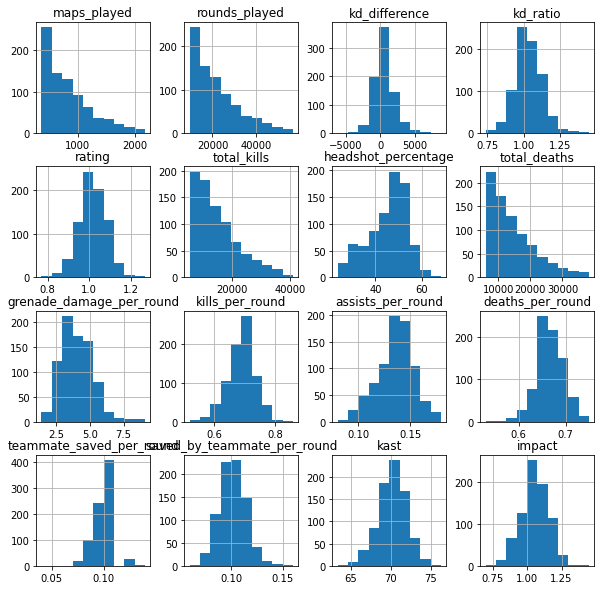

In [14]:
df_numeric.hist(figsize=(10, 10));

### Country Demographics

In [15]:
df_countrycounts = pd.DataFrame(df['country'].value_counts())
df_countrycounts['countries'] = df_countrycounts.index
df_countrycounts = df_countrycounts.reset_index(drop=True)
df_countrycounts.columns = ['counts', 'country']

df_countrycounts.sample(5)

,counts,country
3,59,Brazil
50,1,Guatemala
21,8,Turkey
42,2,Uruguay
11,24,Canada


In [16]:
df_countrycounts.replace('United States', "United States of America", inplace = True)

In [17]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [18]:
m = folium.Map()
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=df_countrycounts,
    columns=['country', 'counts'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    nan_fill_color='white'
).add_to(m)
m

Countries with most players include USA, Denmark, Sweden, Poland, Brazil and Russia.

### Analysis By Countries

Before such analysis, I would like to remove those countries that have less than 5 players in the dataset.

In [19]:
to_remove_countries = list(df_countrycounts.loc[df_countrycounts['counts'] < 5]['country'])
df_c = df[~df['country'].isin(to_remove_countries)]
df_c_means = df_c.groupby('country').agg('mean')
df_c_means = df_c_means.reset_index()

In [20]:
df_c_means.sample(5)

,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
31,Turkey,1017.000000,26687.250000,1748.875000,1.082500,1.051250,19207.1250,46.062500,17450.750000,3.600000,0.707500,0.126250,0.653750,0.090000,0.092500,70.63750,1.108750
22,Portugal,779.125000,20389.750000,237.000000,1.016250,0.998750,13961.1250,45.062500,13724.125000,4.237500,0.680000,0.133750,0.672500,0.098750,0.101250,70.46250,1.068750
9,Denmark,945.013889,24905.805556,507.847222,1.026528,1.001944,16955.3750,45.854167,16447.555556,4.330556,0.676944,0.127500,0.660833,0.096944,0.097778,69.96250,1.036389
18,Mongolia,634.500000,16432.500000,741.000000,1.056667,1.031667,11799.5000,50.450000,11058.500000,3.883333,0.713333,0.140000,0.675000,0.093333,0.095000,70.30000,1.086667
15,Kazakhstan,835.562500,22132.375000,444.875000,1.019375,0.999375,15157.3125,48.250000,14712.437500,3.912500,0.683125,0.125625,0.669375,0.089375,0.090625,69.31875,1.049375


In order keep my plots simple and less cluttered, I am only going to plot the bar chart for the top 10 countries that had most players.

In [21]:
to_plot_countries = list(df_countrycounts.head(11)['country'])
df_to_plot_countries = df_c_means[df_c_means['country'].isin(to_plot_countries)]
df_to_plot_countries

,country,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast,impact
1,Australia,656.347826,16899.260870,643.891304,1.049348,1.024348,11841.369565,44.706522,11197.391304,4.413043,0.697174,0.135652,0.666739,0.096522,0.097174,70.330435,1.080000
4,Brazil,770.118644,20068.847458,888.915254,1.066949,1.031356,13972.677966,44.006780,13083.762712,4.242373,0.695763,0.132712,0.653390,0.094407,0.096102,71.108475,1.073051
7,China,693.285714,17936.714286,663.178571,1.049286,1.028929,12733.821429,47.978571,12070.642857,3.514286,0.708929,0.136071,0.676071,0.100000,0.099643,70.878571,1.087857
9,Denmark,945.013889,24905.805556,507.847222,1.026528,1.001944,16955.375000,45.854167,16447.555556,4.330556,0.676944,0.127500,0.660833,0.096944,0.097778,69.962500,1.036389
11,Finland,865.230769,22947.423077,489.576923,1.020000,1.000769,15730.884615,43.173077,15241.307692,4.673077,0.681538,0.135385,0.669231,0.094231,0.096154,69.757692,1.046923
12,France,1084.807692,28571.000000,912.807692,1.030769,1.007692,19797.423077,47.315385,18884.500000,3.830769,0.681538,0.129615,0.662308,0.096154,0.093846,69.907692,1.033462
13,Germany,1083.000000,28617.760000,27.360000,0.998000,0.985600,19256.880000,45.900000,19229.520000,4.276000,0.671600,0.130400,0.674000,0.096400,0.093200,69.120000,1.020800
21,Poland,1007.750000,26814.173077,308.115385,1.014423,0.997115,18362.711538,44.238462,18054.423077,4.217308,0.682308,0.131154,0.673269,0.091923,0.092308,69.392308,1.037115
24,Russia,850.250000,22538.656250,574.156250,1.038125,1.008750,15476.828125,45.309375,14902.656250,3.915625,0.684063,0.127344,0.663438,0.090781,0.091250,69.779687,1.050625
29,Sweden,1016.730769,26847.519231,672.807692,1.025962,1.003462,18537.942308,45.859615,17865.076923,4.400000,0.683462,0.134615,0.667115,0.092500,0.094615,69.571154,1.039038


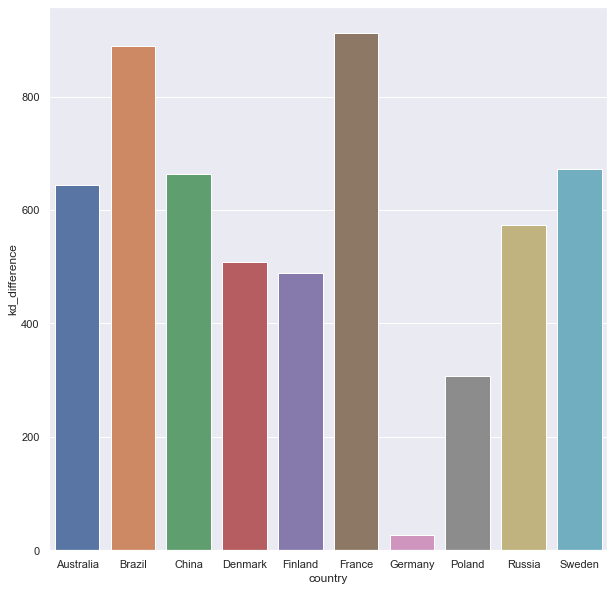

In [22]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x='country', y='kd_difference', data=df_to_plot_countries);

Some of the interesting facts from these countries are as belows: 
<ul>
    <li>French and German players have played the most maps on average, with Sweden being third in this category.</li>
    <li>German players have very slightly lower figures when it comes to ratings and impacts.</li>
</ul>
<strong>Note:</strong> While the statistics do show the average ratings, impacts etc. for the players, they are not the most accurate representation of strength of the players country-wise. The competition in Europe is a lot more tougher as compared to Asia and Australia. The European Country with most mediocre stats (Germany in this case) is still competitively ahead against the likes of China and Australia. 

### Player Nicks

In [23]:
sumNicks = df['nick'].sum()
onlyAlphas = ''.join(c for c in sumNicks if c.isalpha())
onlyNums = ''.join(c for c in sumNicks if c.isnumeric())

alphasDict = dict(Counter(onlyAlphas))
numsDict = dict(Counter(onlyNums))

maxAlpha = max(alphasDict, key=alphasDict.get)
maxNum = max(numsDict, key=numsDict.get)

In [24]:
print("Most common alphabet in Player's nick: ", maxAlpha)
print("Most common number in Player's nick: ", maxNum)

Most common alphabet in Player's nick:  e
Most common number in Player's nick:  1


### Correlation Matrix

Before plotting the correlation matrix, I would like to move the rating column to the end (as it is going to be my target variable in model preparation).

In [25]:
rearrangement_cols = ['maps_played','rounds_played','kd_difference','kd_ratio','total_kills','headshot_percentage','total_deaths',
 'grenade_damage_per_round','kills_per_round','assists_per_round','deaths_per_round','teammate_saved_per_round','saved_by_teammate_per_round',
 'kast','impact', 'rating']
df_numeric = df_numeric[rearrangement_cols]

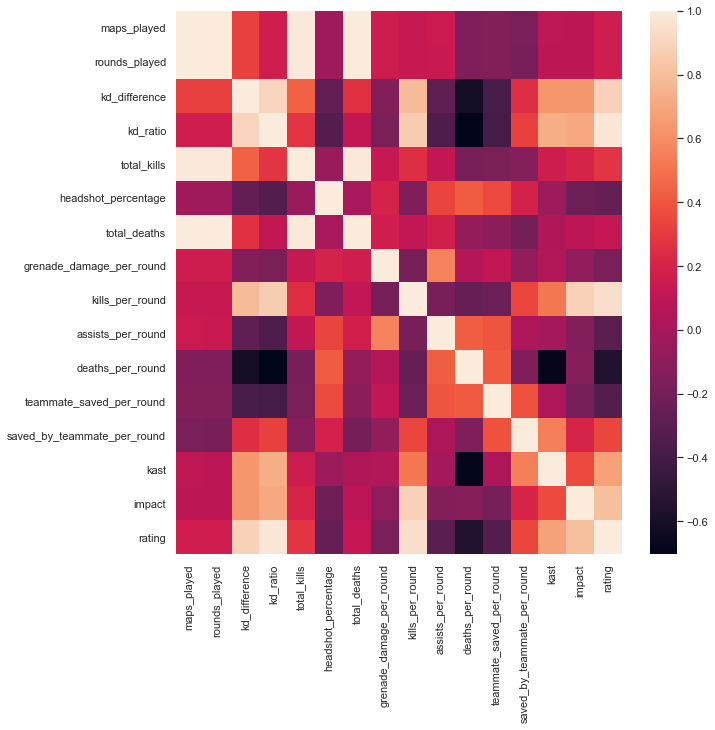

In [26]:
sns.heatmap(df_numeric.corr());

The correlation matrix shows that rating is heavily linked to Kill-Death ratio, Kill-Death Difference, Kills per Round, Deaths Per Round,  KAST and Impact.

### Scatter Matrix

In [27]:
numeric_cols = list(df_numeric.columns)
target_col = numeric_cols.pop()

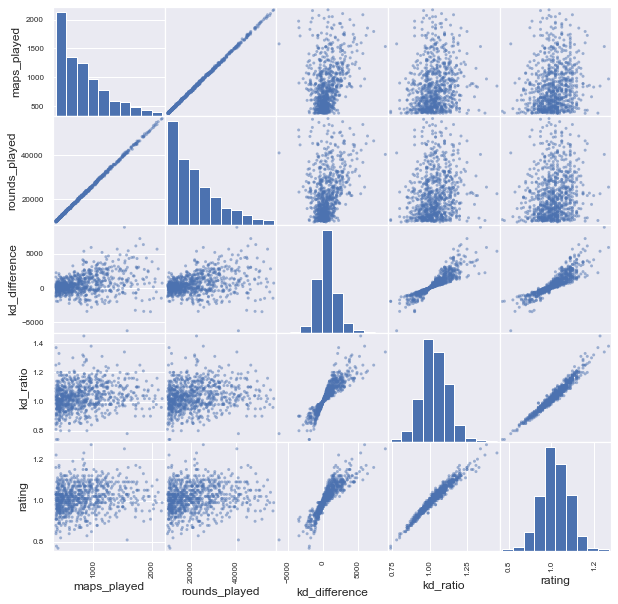

In [28]:
cols_to_plot = numeric_cols[:4] + [target_col]
scatter_matrix(df[cols_to_plot]);

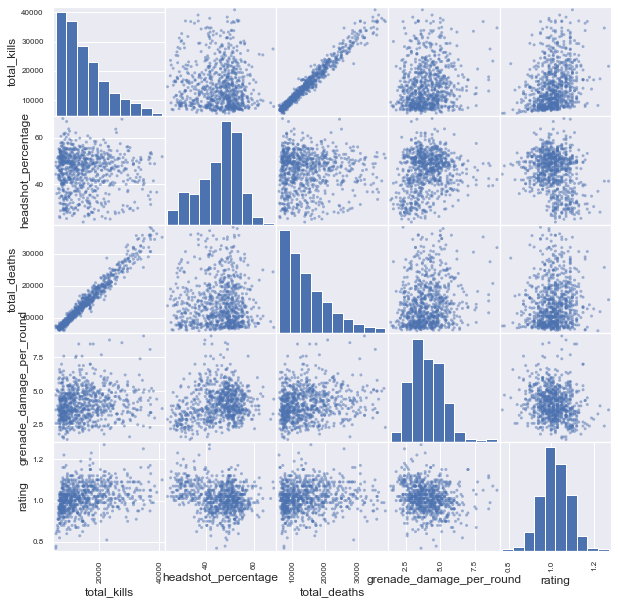

In [29]:
cols_to_plot = numeric_cols[4:8] + [target_col]
scatter_matrix(df[cols_to_plot]);

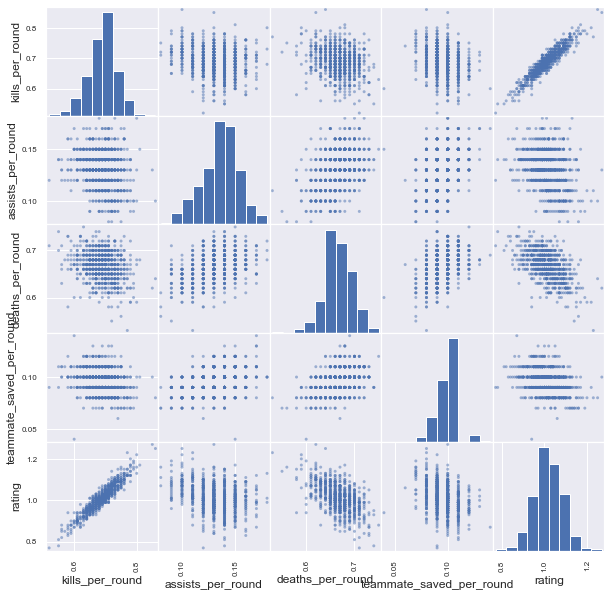

In [30]:
cols_to_plot = numeric_cols[8:12] + [target_col]
scatter_matrix(df[cols_to_plot]);

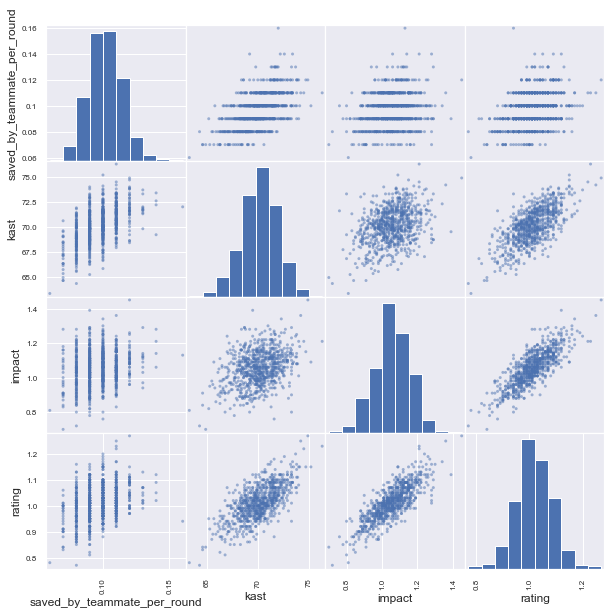

In [31]:
cols_to_plot = numeric_cols[12:] + [target_col]
scatter_matrix(df[cols_to_plot]);

From the scatter matrices, we can derive that: Impact, Kast, Deaths per round, KD-Difference and KD-Ratio are good indicators for rating of a player.

## Model Preparation

We will prepare a very simple Regression Model that can be used to predict the rating of the player.

<ul>
    <li>I will not be using any categorical data like Country, Recent Team etc. even though they can be incorporated in model preparation.</li>
    <li>I will also drop these columns in numerical data: maps_played, rounds_played, total_kills, total_deaths, saved_by_teammate_per_round. These columns are dropped because they had barely any correlation with rating as shown in the correlation matrix.</li>
</ul>

In [32]:
cols_to_drop = ['maps_played', 'rounds_played', 'total_kills', 'total_deaths', 'saved_by_teammate_per_round']
df_train = df_numeric.drop(columns = cols_to_drop)

In [33]:
X, y = df_train.drop(columns = ['rating']), df_train['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Pipeline

In [34]:
lassoPipe = Pipeline([
    ('stdscaler', StandardScaler()),
    ('lasso', Ridge(alpha=0.1))
])

lassoPipe.fit(X_train, y_train)

Pipeline(steps=[('stdscaler', StandardScaler()), ('lasso', Ridge(alpha=0.1))])

### Testing and Analysis

In [35]:
predictions_on_train = lassoPipe.predict(X_train)
squared_error_train = ((predictions_on_train - y_train)**2).sum()
print('Squared Error on Train: ', squared_error_train)

Squared Error on Train:  0.018461439902885922


The small squared error indicates a good fit on the training data. Let's see how it performs on the test data.

In [36]:
predictions_on_test = lassoPipe.predict(X_test)
squared_error_test = ((predictions_on_test - y_test)**2).sum()
print('Squared Error on Test:', squared_error_test)

Squared Error on Test: 0.0045339694084448965


So, our model has been quite successful on predicting ratings. 

## Concluding Remarks

In this notebook:
<ul>
    <li>We learned to train a simple model that can predict ratings of a player based on his KD-Difference, KD-Ratio and other factors.</li>
    <li>We did a little bit of geospatial analysis using folium.</li>
    <li>We extracted out interesting statistics like most kills, best rating, best impact etc. from the dataset.</li>
    <li>We went through different plots for data analysis like histograms, heatmaps, scatter matrix, and barplots.</li>
</ul>